# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import datetime
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_city = []
city_lat = []
city_lng = []
city_max = []
city_temp = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
city_date = []
units = "imperial"

count = 0
set = 1
print("Beginning Data Retrieval")

#Make a request for each of the cities
#for x in range(10):
for x in range(len(cities)):
        count = count + 1
   
        if count <= 50:
            print(f"Processing Weather Record: {x} of Set {set} | {cities[x]}")
            query_url = f"{url}appid={weather_api_key}&q={cities[x]}&units={units}"
            response = requests.get(query_url).json()
                
            try:     
                #lat = weather_json["coord"]["lat"]
                city_city.append(response["name"])
                city_lat.append(response["coord"]["lat"])
                city_lng.append(response["coord"]["lon"])
                city_max.append(response["main"]["temp_max"])
                city_temp.append(response["main"]["temp"])
                city_humidity.append(response["main"]["humidity"])
                city_cloudiness.append(response["clouds"]["all"])
                city_windspeed.append(response["wind"]["speed"])
                city_country.append(response["sys"]["country"])
                city_date.append(response["dt"])     
                print(f"{cities[x]} City found! Appending response")
            except:
                print(f"{cities[x]} City was not found! Skipping...")
                pass
        
        else:
            count = 0
            set = set + 1
            time.sleep(50)

Beginning Data Retrieval
Processing Weather Record: 0 of Set 1 | matinhos
matinhos City found! Appending response
Processing Weather Record: 1 of Set 1 | barrow
barrow City found! Appending response
Processing Weather Record: 2 of Set 1 | itoman
itoman City found! Appending response
Processing Weather Record: 3 of Set 1 | brae
brae City found! Appending response
Processing Weather Record: 4 of Set 1 | riyadh
riyadh City found! Appending response
Processing Weather Record: 5 of Set 1 | barentsburg
barentsburg City was not found! Skipping...
Processing Weather Record: 6 of Set 1 | poum
poum City found! Appending response
Processing Weather Record: 7 of Set 1 | joao camara
joao camara City found! Appending response
Processing Weather Record: 8 of Set 1 | sentyabrskiy
sentyabrskiy City was not found! Skipping...
Processing Weather Record: 9 of Set 1 | thompson
thompson City found! Appending response
Processing Weather Record: 10 of Set 1 | aleksandrow lodzki
aleksandrow lodzki City found! 

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a data frame from cities
weather_dict = {
   "City": city_city,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max temp": city_max,
    "Temp": city_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_cloudiness,
    "Windspeed": city_windspeed,
    "Country": city_country,
    "Date": city_date    
}
weather_data = pd.DataFrame(weather_dict)

In [7]:
weather_data.to_csv("../../output_data/cityweather_data.csv",
                  encoding="utf-8", index=False, header=True)

In [8]:
weather_data.head(20)

,City,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Matinhos,-25.8175,-48.5428,75.65,75.65,87,92,2.59,BR,1639810206
1,Barrow,71.2906,-156.7887,-9.38,-9.38,77,90,21.85,US,1639810207
2,Itoman,26.1247,127.6694,63.37,62.74,59,75,19.57,JP,1639810207
3,Brae,60.3964,-1.3530,46.31,46.31,83,100,14.00,GB,1639810207
4,Riyadh,24.6877,46.7219,68.14,68.14,32,93,13.13,SA,1639809988
5,Poum,-20.2333,164.0167,78.64,78.64,71,78,13.02,NC,1639810208
6,João Câmara,-5.5375,-35.8197,78.04,78.04,86,17,8.90,BR,1639810208
7,Thompson,55.7435,-97.8558,-14.64,-14.64,76,90,2.30,CA,1639810208
8,Aleksandrów Łódzki,51.8196,19.3038,36.09,35.60,89,75,1.01,PL,1639810208
9,Kununurra,-15.7667,128.7333,103.98,103.98,33,100,5.75,AU,1639810209


In [9]:
weather_data.describe()

,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Date
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01
mean,13.595656,37.042167,52.606111,52.473889,69.888889,78.833333,10.964444,1.639810e+09
std,45.041493,98.849229,31.632121,31.584391,20.702057,30.411395,7.463385,6.539815e+01
min,-46.600000,-156.788700,-14.640000,-14.640000,27.000000,0.000000,1.010000,1.639810e+09
25%,-24.421450,-37.182525,32.902500,32.780000,65.250000,75.000000,5.427500,1.639810e+09
50%,12.610500,31.035800,60.580000,60.265000,73.500000,91.000000,9.865000,1.639810e+09
75%,54.762525,128.467325,75.515000,75.212500,85.250000,100.000000,17.307500,1.639810e+09
max,78.218600,168.864300,103.980000,103.980000,98.000000,100.000000,24.960000,1.639810e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
index =  weather_data[weather_data['Humidity'] >= 100].index
index

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(index,inplace=False)

In [12]:
clean_city_data.describe()

,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Date
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01
mean,13.595656,37.042167,52.606111,52.473889,69.888889,78.833333,10.964444,1.639810e+09
std,45.041493,98.849229,31.632121,31.584391,20.702057,30.411395,7.463385,6.539815e+01
min,-46.600000,-156.788700,-14.640000,-14.640000,27.000000,0.000000,1.010000,1.639810e+09
25%,-24.421450,-37.182525,32.902500,32.780000,65.250000,75.000000,5.427500,1.639810e+09
50%,12.610500,31.035800,60.580000,60.265000,73.500000,91.000000,9.865000,1.639810e+09
75%,54.762525,128.467325,75.515000,75.212500,85.250000,100.000000,17.307500,1.639810e+09
max,78.218600,168.864300,103.980000,103.980000,98.000000,100.000000,24.960000,1.639810e+09


In [13]:
clean_city_data.head(10)

,City,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Matinhos,-25.8175,-48.5428,75.65,75.65,87,92,2.59,BR,1639810206
1,Barrow,71.2906,-156.7887,-9.38,-9.38,77,90,21.85,US,1639810207
2,Itoman,26.1247,127.6694,63.37,62.74,59,75,19.57,JP,1639810207
3,Brae,60.3964,-1.3530,46.31,46.31,83,100,14.00,GB,1639810207
4,Riyadh,24.6877,46.7219,68.14,68.14,32,93,13.13,SA,1639809988
5,Poum,-20.2333,164.0167,78.64,78.64,71,78,13.02,NC,1639810208
6,João Câmara,-5.5375,-35.8197,78.04,78.04,86,17,8.90,BR,1639810208
7,Thompson,55.7435,-97.8558,-14.64,-14.64,76,90,2.30,CA,1639810208
8,Aleksandrów Łódzki,51.8196,19.3038,36.09,35.60,89,75,1.01,PL,1639810208
9,Kununurra,-15.7667,128.7333,103.98,103.98,33,100,5.75,AU,1639810209


In [14]:
clean_city_data.shape

(18, 10)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

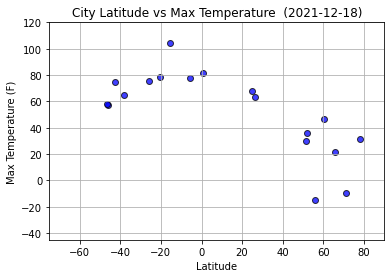

In [15]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Max temp"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
date = datetime.date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature  ({date})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-75,90)
plt.ylim(-45, 120)

# Save the figure
plt.savefig("../../output_data/LatMaxTempInWorldCities.png")

# Show plot
plt.show()

This plot shows that Temperatures cool with increasing Latitude! There is a relationship between Latitude and Temperature around the world, as temperatures are typically warmer approaching the Equator and cooler approaching the Poles.
The Equator has a latitude of 0°, the North Pole has a latitude of 90° North (written 90° N or +90°), and the South Pole has a latitude of 90° South (written 90° S or −90°)
This plot uses the degree Fahrenheit (symbol: °F) as the unit of measure for temperature. On the Fahrenheit scale, the melting point of water is 32°F and the boiling point is 212°F (at standard atmospheric pressure). The world temperatures plotted appear to be mostly within this range.

## Latitude vs. Humidity Plot

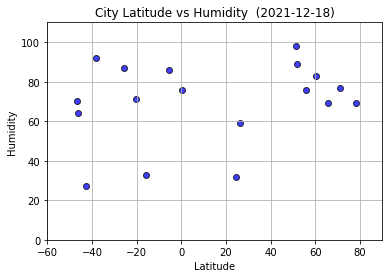

In [16]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
date = datetime.date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity  ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.xlim(-60, 90)
plt.ylim(0, 110)

# Save the figure
plt.savefig("../../output_data/LatHumidityWorldCities.png")

# Show plot
plt.show()

Humidity does not show a strong correlation to latitude. The visualization shows a variety of humidity percentages at different latitudes.Humidity is the concentration of water vapour present in the air and indicates the likelihood for precipitation, dew, or fog to be present.
The humidity is affected by winds and by rainfall. The most humid cities on earth are generally located closer to the equator, near coastal regions. The visualisation shows higher humidity near the tropical equator.
Humidity depends on the temperature and pressure of the system of interest. When the temperature rises, humidity decreases and when temperature decreases, humidity increases. The same amount of water vapor results in higher humidity in cool air than warm air. The plot shows a relative humidity higher closer to polar regions.

## Latitude vs. Cloudiness Plot

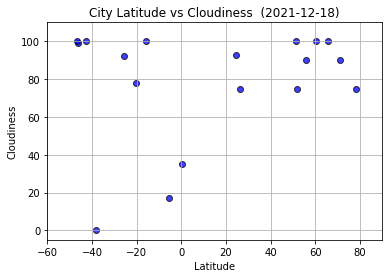

In [17]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
date = datetime.date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness  ({date})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)
plt.ylim(-5, 110)

# Save the figure
plt.savefig("../../output_data/LatCloudinessInWorldCities.png")

# Show plot
plt.show()

We cannot see a distictive pattern between Cloudiness and Latitude. Continents tend to be less cloudy than adjacent oceans (at the same latitude), except in the equatorial belt. Cloudiness is highest around 60° S but there is less cloud cover at the South Pole. This figure reflects the ascent and subsidence occurring at these respective latitudes, and the large amount of ocean at around 60° S.

## Latitude vs. Wind Speed Plot

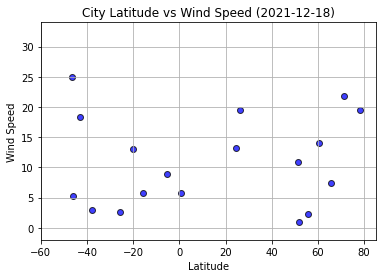

In [18]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Windspeed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
date = datetime.date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60, 85)
plt.ylim(-2,34)


# Save the figure
plt.savefig("../../output_data/LatWindSpeedInWorldCities.png")

# Show plot
plt.show()

The plot shows that there is no direct relationship between wind speed and latitude. 
A force called the Coriolis force causes the wind to deflect to the right of its intent path in the Northern Hemisphere and to the left in the Southern Hemisphere. The Corioils force is zero at the equator. The magnitude of Coriolis force depends on (1) the rotation of the Earth, (2) the speed of the moving object, and (3) its latitudinal location. The stronger the speed (such as wind speed), the stronger the Coriolis force. The higher the latitude, the stronger the Coriolis force. The affect is shown in our plot around 60° N Latitude.

# Linear Regression

In [25]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
nh_df = clean_city_data.loc[(clean_city_data['Lat'] >= 0),:]
nh_df

,City,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Country,Date
1,Barrow,71.2906,-156.7887,-9.38,-9.38,77,90,21.85,US,1639810207
2,Itoman,26.1247,127.6694,63.37,62.74,59,75,19.57,JP,1639810207
3,Brae,60.3964,-1.3530,46.31,46.31,83,100,14.00,GB,1639810207
4,Riyadh,24.6877,46.7219,68.14,68.14,32,93,13.13,SA,1639809988
7,Thompson,55.7435,-97.8558,-14.64,-14.64,76,90,2.30,CA,1639810208
8,Aleksandrów Łódzki,51.8196,19.3038,36.09,35.60,89,75,1.01,PL,1639810208
12,Tasiilaq,65.6145,-37.6368,21.72,21.72,69,100,7.38,GL,1639810210
13,Longyearbyen,78.2186,15.6401,31.84,31.84,69,75,19.57,SJ,1639810210
15,Thinadhoo,0.5333,72.9333,81.95,81.95,76,35,5.77,MV,1639810211
17,Kamenka,51.3223,42.7678,29.75,29.75,98,100,10.83,RU,1639810211


In [26]:
# Southern Hemisphere (less than 0 degrees latitude):
sh_df = clean_city_data.loc[(clean_city_data['Lat'] <= 0),:]
sh_df

,City,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Matinhos,-25.8175,-48.5428,75.65,75.65,87,92,2.59,BR,1639810206
5,Poum,-20.2333,164.0167,78.64,78.64,71,78,13.02,NC,1639810208
6,João Câmara,-5.5375,-35.8197,78.04,78.04,86,17,8.90,BR,1639810208
9,Kununurra,-15.7667,128.7333,103.98,103.98,33,100,5.75,AU,1639810209
10,Mataura,-46.1927,168.8643,57.47,57.47,64,99,5.32,NZ,1639810209
11,Mar del Plata,-38.0023,-57.5575,65.08,65.03,92,0,3.00,AR,1639810209
14,Bluff,-46.6000,168.3333,57.79,57.79,70,100,24.96,NZ,1639810210
16,Hobart,-42.8794,147.3294,75.11,73.90,27,100,18.41,AU,1639810027


#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.77
The r-squared is: 0.5870280960216215


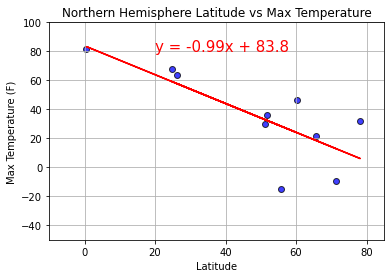

In [32]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
x = nh_df['Lat'].astype('float')
y = nh_df["Max temp"].astype('float')

def NorthLatTemp(x,y):

    # Build a scatter plot for each data type
    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    # Incorporate the other graph properties
    plt.title("Northern Hemisphere Latitude vs Max Temperature")
    plt.ylabel("Max Temperature (F)")
    plt.xlabel("Latitude")
    plt.grid(True)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(20,80),fontsize=15,color="red")

    plt.xlim(-10,85)
    plt.ylim(-50,100)
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()
    
NorthLinReg(x,y)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.72
The r-squared is: 0.524563375259929


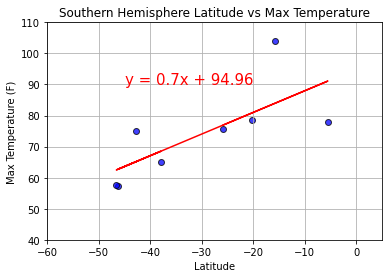

In [33]:
# Southern Hemisphere (greater than or equal to 0 degrees latitude)
x = sh_df['Lat']
y = sh_df["Max temp"]

def SouthLatTemp(x,y):

    # Build a scatter plot for each data type
    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    # Incorporate the other graph properties
    plt.title("Southern Hemisphere Latitude vs Max Temperature")
    plt.ylabel("Max Temperature (F)")
    plt.xlabel("Latitude")
    plt.grid(True)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(-45,90),fontsize=15,color="red")

    plt.xlim(-60,5)
    plt.ylim(40,110)
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()
    
SouthLinReg(x,y)

TASK: After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have:

Correlation is a measurement of the strength of the relationship between two variables and their association with each other. It takes values between -1 and 1. 
r-squared is how well the regression model fits the observed data and takes values between 0 and 1.
Northern Hemisphere - Max Temp vs. Latitude Linear Regression scatter plot shows a high negative correlation of -0.84. This indicates as the temperature decreases as the latitude increases and vice versa. The r-squared of 0.70 shows a good fit to the data.
Southern Hemisphere - Max Temp vs. Latitude Linear Regression scatter plot shows a moderate positive correlation of 0.43. This indicates as the temperature increases as the latitude increases. The r-squared of 0.19 shows a poor fit to the data.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.33
The r-squared is: 0.11191678612783161


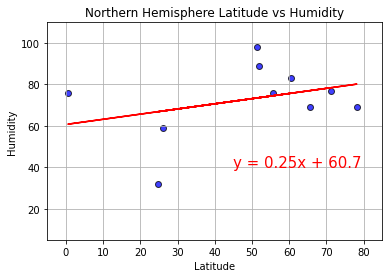

In [34]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
x = nh_df['Lat']
y = nh_df["Humidity"]

def NorthLatHum(x,y):

    # Build a scatter plot for each data type
    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    # Incorporate the other graph properties
    plt.title("Northern Hemisphere Latitude vs Humidity")
    plt.ylabel("Humidity")
    plt.xlabel("Latitude")
    plt.grid(True)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(45,40),fontsize=15,color="red")

    plt.xlim(-5,85)
    plt.ylim(5,110)
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()

NorthLatHum(x,y)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.16
The r-squared is: 0.024755355094969376


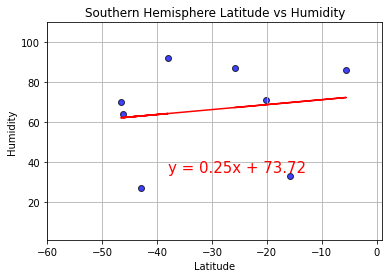

In [24]:
# Southern Hemisphere (greater than or equal to 0 degrees latitude)
x = sh_df['Lat']
y = sh_df["Humidity"]

def SouthLatHum(x,y):

    # Build a scatter plot for each data type
    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    # Incorporate the other graph properties
    plt.title("Southern Hemisphere Latitude vs Humidity")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity")

    plt.grid(True)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(-38,35),fontsize=15,color="red")
    plt.xlim(-60,1)
    plt.ylim(1,110)
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()

SouthLatHum(x,y)

TASK: After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have:

Correlation is a measurement of the strength of the relationship between two variables and their association with each other. It takes values between -1 and 1. 
r-squared is how well the regression model fits the observed data and takes values between 0 and 1.
Northern Hemisphere - Humidity vs. Latitude Linear Regression scatter plot shows a moderate positive correlation of 0.34. This indicates as the humidity increases as the latitude increases. The r-squared of 0.12 shows a poor fit to the data.
Southern Hemisphere - Humidity vs. Latitude Linear Regression scatter plot shows a moderate positive correlation of 0.42. This indicates as the humidity increases as the latitude increases. The r-squared of 0.18 shows a poor fit to the data.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.63
The r-squared is: 0.3967632778731555


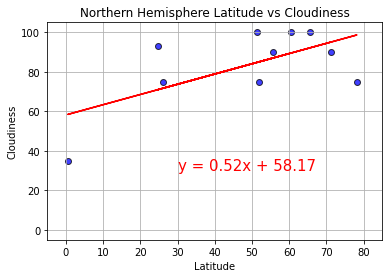

In [35]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
x = nh_df['Lat']
y = nh_df["Cloudiness"]

def NorthLatCloud(x,y):

    # Build a scatter plot for each data type
    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    # Incorporate the other graph properties
    plt.title("Northern Hemisphere Latitude vs Cloudiness")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness")

    plt.grid(True)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(30,30),fontsize=15,color="red")
    plt.xlim(-5,85)
    plt.ylim(-5,105)
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()

NorthLatCloud(x,y)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.34
The r-squared is: 0.1126957016120338


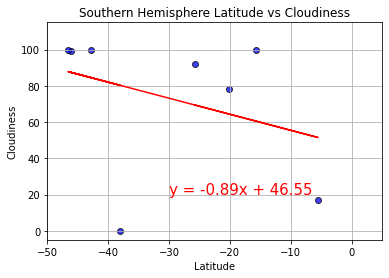

In [36]:
# Southern Hemisphere (greater than or equal to 0 degrees latitude)
x = sh_df['Lat']
y = sh_df["Cloudiness"]

def SouthLatCloud(x,y):

    # Build a scatter plot for each data type
    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    # Incorporate the other graph properties
    plt.title("Southern Hemisphere Latitude vs Cloudiness")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness")

    plt.grid(True)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
    plt.xlim(-50,5)
    plt.ylim(-5,115)
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()

SouthLatCloud(x,y)

TASK: After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have:

Correlation is a measurement of the strength of the relationship between two variables and their association with each other. It takes values between -1 and 1. 
r-squared is how well the regression model fits the observed data and takes values between 0 and 1.
Northern Hemisphere - Cloudiness vs. Latitude Linear Regression scatter plot shows a low positive correlation of 0.19. This indicates as the cloudiness increases slightly as the latitude increases. The r-squared of 0.04 shows a poor fit to the data.
Southern Hemisphere - Cloudiness vs. Latitude Linear Regression scatter plot shows a moderate positive correlation of 0.45. This indicates as the cloudiness increases as the latitude increases. The r-squared of 0.20 shows a low fit to the data.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.24
The r-squared is: 0.05778777826291119


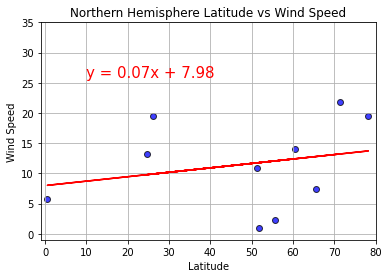

In [38]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
x = nh_df['Lat']
y = nh_df["Windspeed"]

def NorthLatWind(x,y):

    # Build a scatter plot for each data type
    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    # Incorporate the other graph properties
    plt.title("Northern Hemisphere Latitude vs Wind Speed")
    plt.ylabel("Wind Speed")
    plt.xlabel("Latitude")
    plt.grid(True)

    plt.xlim(-1,80)
    plt.ylim(-1,35)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(10,26),fontsize=15,color="red")
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()

NorthLatWind(x,y)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.36
The r-squared is: 0.13039736787205644


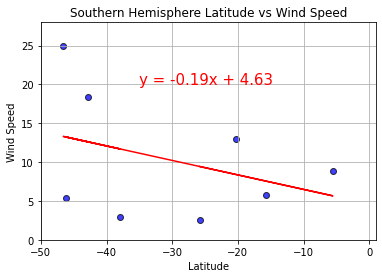

In [39]:
# Southern Hemisphere (greater than or equal to 0 degrees latitude)
x = sh_df['Lat']
y = sh_df["Windspeed"]

def SouthLatWind(x,y):

    # Build a scatter plot for each data type
    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    plt.xlim(-50,1)
    plt.ylim(0,28)

    # Incorporate the other graph properties
    plt.title("Southern Hemisphere Latitude vs Wind Speed")
    plt.ylabel("Wind Speed")
    plt.xlabel("Latitude")
    plt.grid(True)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(-35,20),fontsize=15,color="red")
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()
    
SouthLatWind(x,y)

TASK: After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have:

Correlation is a measurement of the strength of the relationship between two variables and their association with each other. It takes values between -1 and 1. 
r-squared is how well the regression model fits the observed data and takes values between 0 and 1.
Northern Hemisphere - Wind Speed vs. Latitude Linear Regression scatter plot shows a low positive correlation of 0.04. This indicates as the windspeed increases slightly as the latitude increases. The r-squared of 0.001 shows a very poor fit to the data.
Southern Hemisphere - Wind Speed vs. Latitude Linear Regression scatter plot shows a moderate negative correlation of -0.39. This indicates as the windspeed decreases as the latitude increases and vice versa. The r-squared of 0.15 shows a poor fit to the data.